🚗🔌 Electric Vehicle Population Data: Cleaning & Initial Exploration Script


In [13]:
# 📦 Step 1: Import Libraries
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
# import missingno as msno  # Commented out to avoid ImportError

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 📥 Step 2: Load the Data
file_path = "C:/Users/sm640/Downloads/Electric_Vehicle_Population_Data (1).csv"
df = pd.read_csv(file_path)

# 🧼 Step 3: Clean Column Names
df.columns = df.columns.str.strip()

# 🔍 Step 4: Initial Data Inspection
print("✅ Dataset shape:", df.shape)
print("\n🔠 Column types:\n", df.dtypes)
print("\n🧾 First 5 rows:\n", df.head())
print("\n❓ Missing values:\n", df.isnull().sum())

# 📊 Step 5: Basic Statistics
print("\n📈 Summary statistics:\n", df.describe(include='all'))

# 📤 Step 6: Drop Rows with Missing EV Range or Key Info
df = df.dropna(subset=["Electric Range", "Base MSRP"])
print("\n📉 Shape after dropping rows with missing Electric Range or MSRP:", df.shape)

# 🧠 Step 7: Unique Value Exploration
print("\n📅 Unique model years:", df["Model Year"].nunique())
print("🚗 Unique makes:", df["Make"].nunique())
print("📍 Unique cities:", df["City"].nunique())
print("🔌 Unique electric utilities:", df["Electric Utility"].nunique())

# 🎯 Step 8: Check for Duplicates
print("\n🔁 Duplicate rows:", df.duplicated().sum())

# 📈 Step 9: Visualize Remaining Missing Data
# msno.matrix(df)
# plt.title("Missing Data Overview")
# plt.show()

# ✅ Step 10: Save Cleaned Data
df.to_csv("cleaned_ev_data.csv", index=False)
print("\n📁 Cleaned data saved as 'cleaned_ev_data.csv'")


✅ Dataset shape: (235692, 17)

🔠 Column types:
 VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                     

Analyze EV Adoption Trends

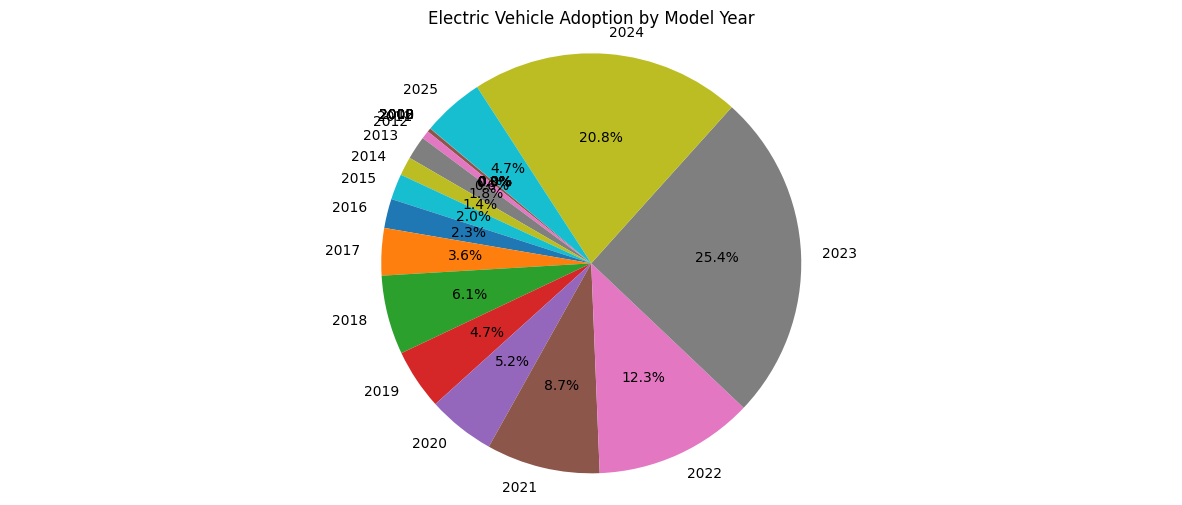

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/sm640/Downloads/Electric_Vehicle_Population_Data (1).csv")

# Count number of EVs per model year
ev_by_year = df['Model Year'].value_counts().sort_index()

# Plotting pie chart
plt.figure(figsize=(15,6))
plt.pie(ev_by_year, labels=ev_by_year.index, autopct='%1.1f%%', startangle=140)
plt.title('Electric Vehicle Adoption by Model Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Evaluate Manufacturer and Model Popularity

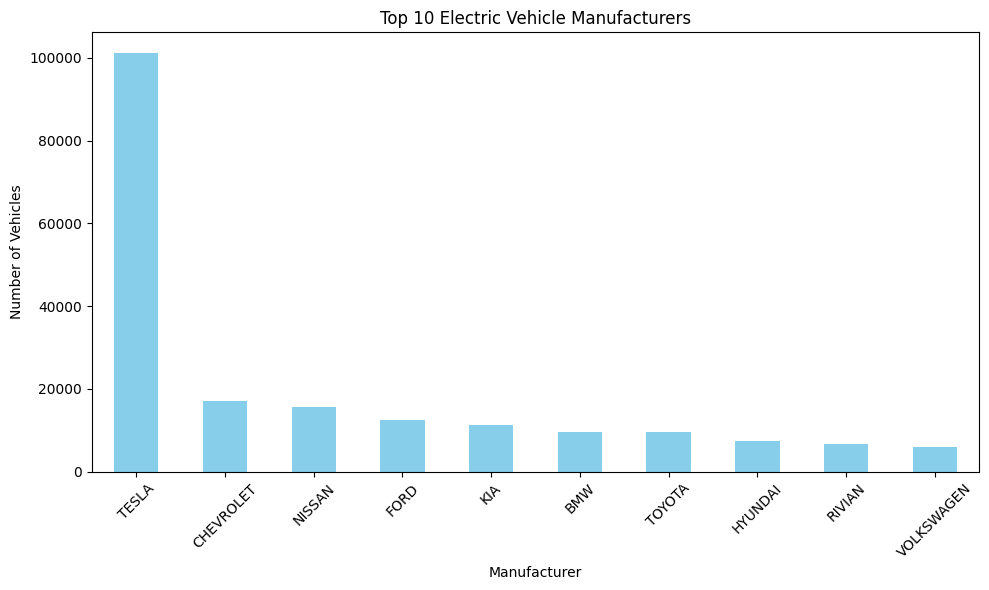

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/sm640/Downloads/Electric_Vehicle_Population_Data (1).csv")

# Count of EVs by Make
make_counts = df['Make'].value_counts().head(10)

# Plotting bar chart
plt.figure(figsize=(10, 6))
make_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Electric Vehicle Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Study Geographic Distribution

<Figure size 1200x600 with 0 Axes>

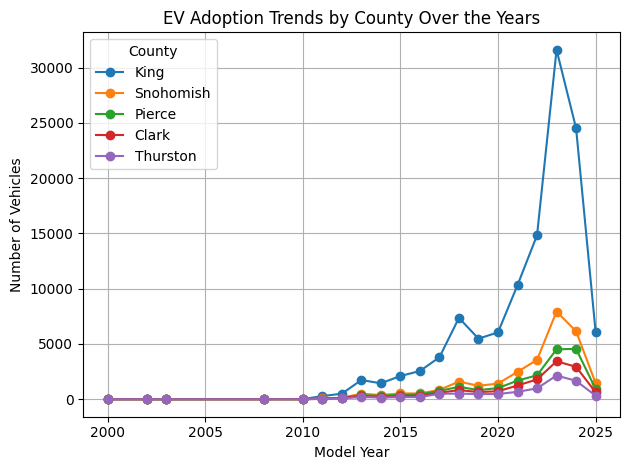

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/sm640/Downloads/Electric_Vehicle_Population_Data (1).csv")

# Clean missing values
df = df.dropna(subset=['County'])

# Group by County and Model Year
ev_by_county_year = df.groupby(['County', 'Model Year']).size().unstack(level=0).fillna(0)

# Select top 5 counties by total EV count
top_counties = df['County'].value_counts().head(5).index
ev_by_top_counties = ev_by_county_year[top_counties]

# Plot
plt.figure(figsize=(12, 6))
ev_by_top_counties.plot(kind='line', marker='o')
plt.title('EV Adoption Trends by County Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='County')
plt.grid(True)
plt.tight_layout()
plt.show()


Assess Clean Fuel Eligibility and Environmental Impact

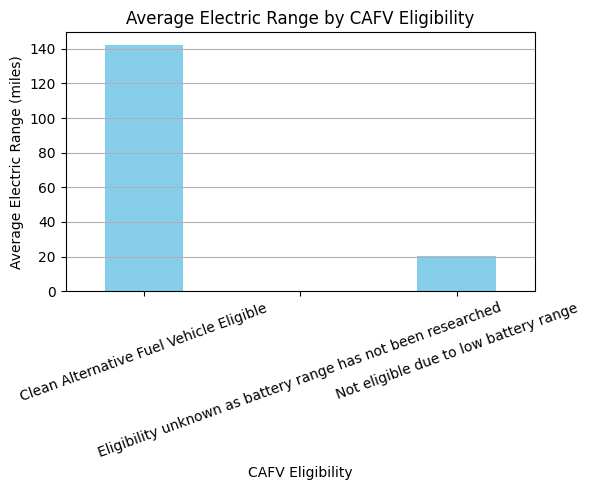

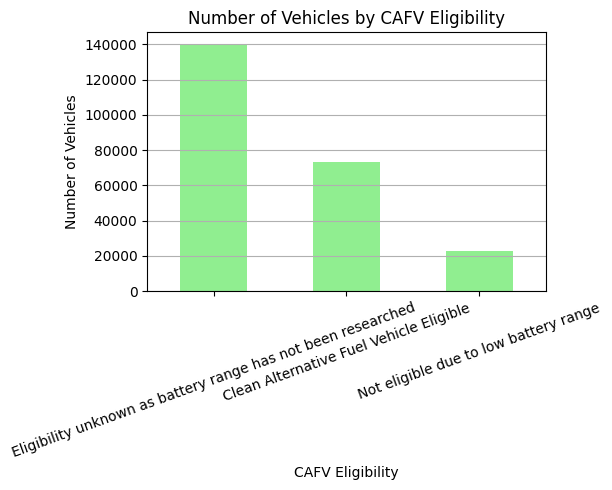

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/sm640/Downloads/Electric_Vehicle_Population_Data (1).csv")

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Electric Range', 'Base MSRP', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Calculate average electric range for each CAFV category
avg_range_by_cafv = df_clean.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range'].mean()

# Plot bar graph
plt.figure(figsize=(6, 5))
avg_range_by_cafv.plot(kind='bar', color='skyblue')
plt.title('Average Electric Range by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Count of vehicles by CAFV eligibility
count_by_cafv = df_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Plot bar graph
plt.figure(figsize=(6, 5))
count_by_cafv.plot(kind='bar', color='lightgreen')
plt.title('Number of Vehicles by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Support Policy and Infrastructure Decisions

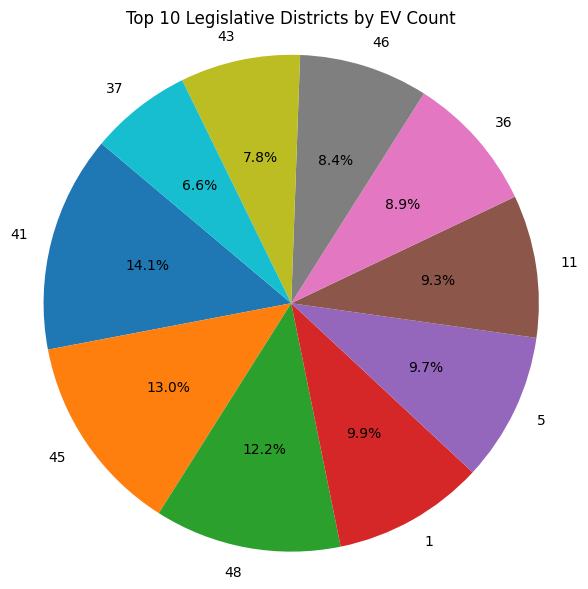

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/sm640/Downloads/Electric_Vehicle_Population_Data (1).csv")

# Drop missing values in Legislative District
df_leg = df.dropna(subset=['Legislative District'])

# Count EVs by Legislative District
district_counts = df_leg['Legislative District'].value_counts().head(10)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(district_counts, labels=district_counts.index.astype(int), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Legislative Districts by EV Count')
plt.axis('equal')
plt.tight_layout()
plt.show()
